In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import utils 

# define the submission/grader object for this exercise
grader = utils.Grader()

In [2]:
def warmUpExercise():
    """
    Example function in Python which computes the identity matrix.
    
    Returns
    -------
    A : array_like
        The 5x5 identity matrix.
    
    Instructions
    ------------
    Return the 5x5 identity matrix.
    """    
    # ======== YOUR CODE HERE ======
    A = np.eye(5)   # modify this line
    
    # ==============================
    return A

In [3]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [4]:
data = pd.read_csv("ex1data1.txt", header = None)
data.head(5)

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [6]:
X = data[0]
y = data[1]

Text(0.5,0,'Population of City in 10,000s')

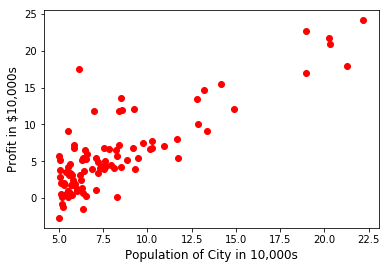

In [7]:
plt.scatter(X,y, color = 'r')
plt.ylabel('Profit in $10,000s', fontsize = 12)
plt.xlabel('Population of City in 10,000s', fontsize = 12)


In [8]:
m = len(data.values[:,-1])
X = np.append(np.ones((m,1)), data.values[:,0].reshape(m,1), axis = 1)
y = data.values[:,1].reshape(m,1)
theta = np.array([0.0,0.0])

In [9]:
def computecost(X,y,theta):
    m = y.size
    J = 1/(2*m)* np.sum((X.dot(theta.transpose()) - y)**2)
    return J

In [10]:
J = computecost(X, y, theta=np.array([[0.0,0.0]]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J = computecost(X, y, theta=np.array([[-1, 2]]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


In [11]:
def gradientdescent(X,y,theta,alpha,num_epochs):
        # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_epochs):
        # ==================== YOUR CODE HERE =================================
        predictions = X.dot(theta.transpose())
        error = np.dot((predictions -y).transpose(), X)
        descent=alpha * 1/m * error
        theta-=descent

        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append(computecost(X, y, theta))
    
    return theta, J_history

In [12]:
#Gradient descent parameters
num_epochs = 1500
alpha = 0.01
theta = np.array([[0.0,0.0]])
theta, J_history = gradientdescent(X ,y, theta, alpha, num_epochs)
print('Theta found by gradient descent: {:.4f}, {:.4f}', theta)
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: {:.4f}, {:.4f} [[-3.63029144  1.16636235]]
Expected theta values (approximately): [-3.6303, 1.1664]


In [13]:
def predict(X,theta):
    
    predictions= np.dot(X, theta.transpose())
    
    return predictions[0]

predict1=predict(np.array([1,3.5]),theta)*10000
print("For population = 35,000, we predict a profit of $"+str(round(predict1,0)))

For population = 35,000, we predict a profit of $4520.0


In [14]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = predict(np.array([1, 3.5]), theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = predict(np.array([1, 7]), theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45



In [15]:
data = pd.read_csv("ex1data2.txt", header = None)
data.head(5)
m = len(data.values)
X = data.values[:,:2]
Y = data.values[:,2].reshape(m,1)
print(Y.shape)

(47, 1)


In [16]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_norm = (X-mu)/sigma
    # ================================================================
    return X_norm, mu, sigma

In [26]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

X_norm = np.append(np.ones((m,1)), X_norm, axis = 1)


Computed mean: [2000.68085106    3.17021277]
Computed standard deviation: [7.86202619e+02 7.52842809e-01]


(47, 3)

In [51]:
alpha = 0.01
num_iters =400
theta = np.zeros((1,3))
theta, J_history = gradientDescentMulti(X_norm, Y, theta, alpha, num_iters)
print(theta)

[[334302.06399328  99411.44947359   3267.01285407]]


In [47]:
J = computecost(X_norm, Y, theta=np.array([[0.0,0.0,0.0]]))
print(J)

65591548106.45744
